In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

In [64]:
data=pd.read_csv("C:/Users/USER/Desktop/data.csv")
data.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [66]:
diagnosis = data['diagnosis']
data = data.drop('diagnosis', axis=1)

# impute missing values using mean strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data)
data = pd.DataFrame(imputer.transform(data), columns=data.columns)

# add the diagnosis column back
data['diagnosis'] = diagnosis

# split the data into M and B dataframes
M = data[data['diagnosis'] == 'M']
B = data[data['diagnosis'] == 'B']

ValueError: Shape of passed values is (569, 31), indices imply (569, 32)

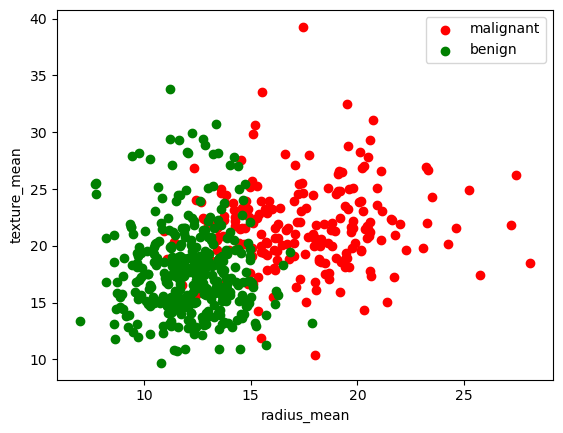

In [5]:
plt.scatter(M.radius_mean, M.texture_mean, color="red", label="malignant")
plt.scatter(B.radius_mean, B.texture_mean, color="green", label="benign")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [24]:
data.diagnosis=[1 if each=="M" else 0 for each in data.diagnosis]

y=data.diagnosis.values
x_data=data.drop(["diagnosis"], axis=1)


In [48]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x_data)
x_data = pd.DataFrame(imputer.transform(x_data), columns=x_data.columns)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)


In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
x_train = x_.fillna(x_train.mean())

knn.fit(x_train, y_train)
prediction= knn.predict(x_test)
prediction

AttributeError: module 'numpy' has no attribute 'fillna'